# Overfitting

### What is Overfitting?
- Overfitting Happens when a deep learning model learns the training data too well, including the noise, random fluctuations, and irrelevant details, instead of just the underlying patterns.
- Overfitting is a common explanation for the poor performance of a predictive model.
- Overfitting refers to an unwanted behavior of a machine learning algorithm used for predictive modeling.

As a result:
- The model performs very well on training data, but poorly on unseen(test/validation) data -> bad generalization.
- 👉 In other words: The model memorizes instead of learning.

### Why Does Overfitting Happen?
- 1. Too complex model (high capacity): Many layers/neurons can memorize data.
- 2. Insufficient training data: Model learns noise because data is limited. 
- 3. Too many epochs: Training too long makes model fit even random noise.
- 4. Imbalanced data: Model memorizes majority class.
- 5. No regularization: Nothing prevents memorization of details.

### Example (Visualization)
Imagine fitting a curve to points:
- Underfitting (high bias): Straight line (too simple, misses patterns).
- Good Fit: Smooth curve (captures trend, generalizes well).
- Overfitting (high variance): Wiggly curve (passes through every point, memorizes noise).

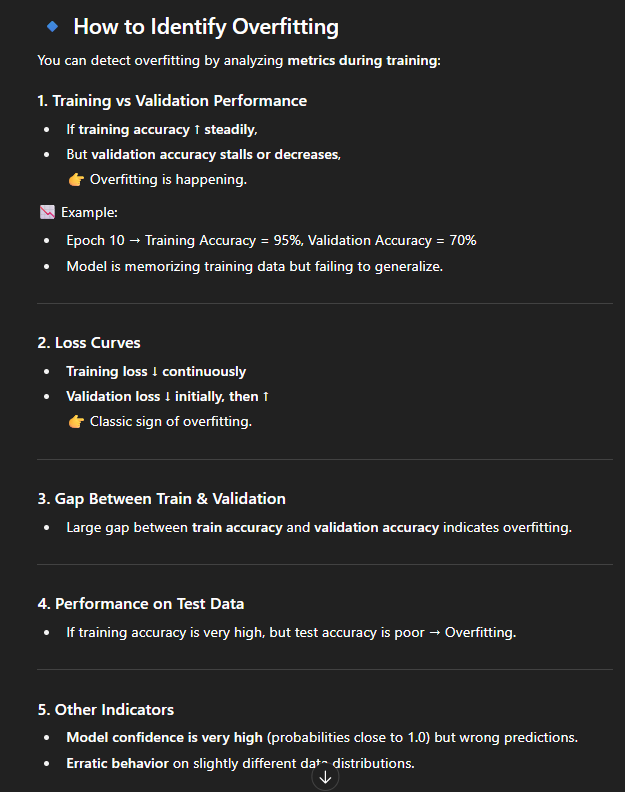

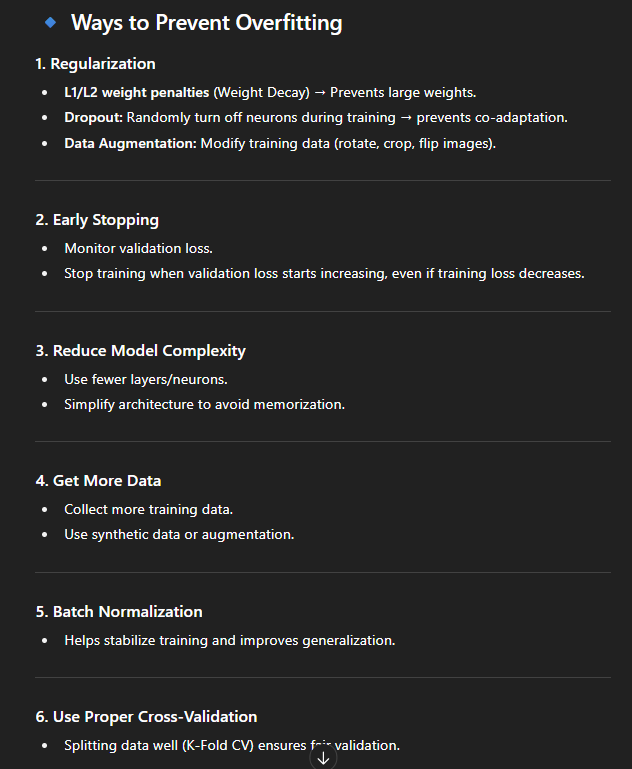
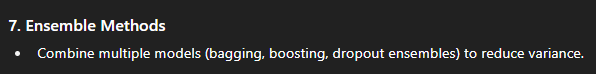

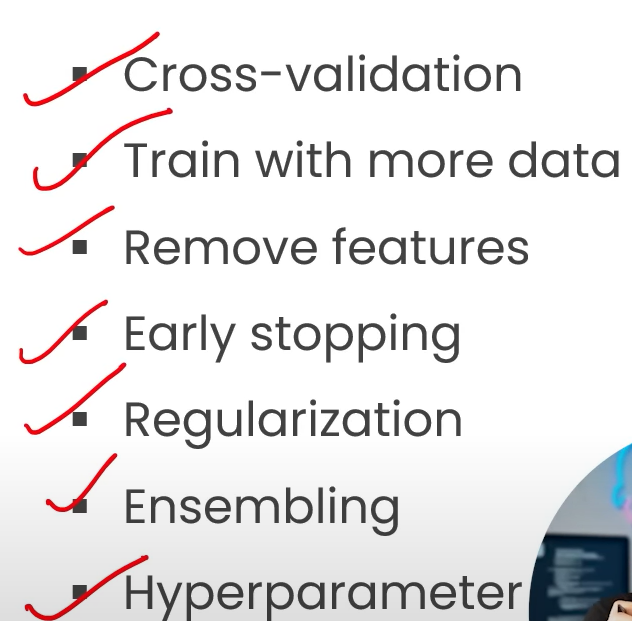

| Symptom of Overfitting                          | What Happens                  | How to Fix                         |
| ----------------------------------------------- | ----------------------------- | ---------------------------------- |
| Training accuracy high, validation accuracy low | Model memorizes training data | Regularization, dropout, more data |
| Training loss ↓, validation loss ↑              | Poor generalization           | Early stopping                     |
| Big gap between train vs val/test accuracy      | Over-complex model            | Simplify architecture              |
| Wrong predictions but high confidence           | Model is overconfident        | Use dropout, calibration           |


---

# Example

Epoch 1/10
375/375 - 5s - 13ms/step - accuracy: 0.9278 - loss: 0.2360 - val_accuracy: 0.9656 - val_loss: 0.1148
Epoch 2/10
375/375 - 3s - 8ms/step - accuracy: 0.9728 - loss: 0.0873 - val_accuracy: 0.9707 - val_loss: 0.0987
Epoch 3/10
375/375 - 4s - 10ms/step - accuracy: 0.9807 - loss: 0.0627 - val_accuracy: 0.9753 - val_loss: 0.0863
Epoch 4/10
375/375 - 4s - 10ms/step - accuracy: 0.9856 - loss: 0.0455 - val_accuracy: 0.9751 - val_loss: 0.0859
Epoch 5/10
375/375 - 4s - 10ms/step - accuracy: 0.9885 - loss: 0.0358 - val_accuracy: 0.9782 - val_loss: 0.0873
Epoch 6/10
375/375 - 4s - 12ms/step - accuracy: 0.9895 - loss: 0.0333 - val_accuracy: 0.9783 - val_loss: 0.0812
Epoch 7/10
375/375 - 4s - 12ms/step - accuracy: 0.9922 - loss: 0.0244 - val_accuracy: 0.9783 - val_loss: 0.0923
Epoch 8/10
375/375 - 4s - 10ms/step - accuracy: 0.9925 - loss: 0.0238 - val_accuracy: 0.9787 - val_loss: 0.0809
Epoch 9/10
375/375 - 4s - 10ms/step - accuracy: 0.9938 - loss: 0.0191 - val_accuracy: 0.9778 - val_loss: 

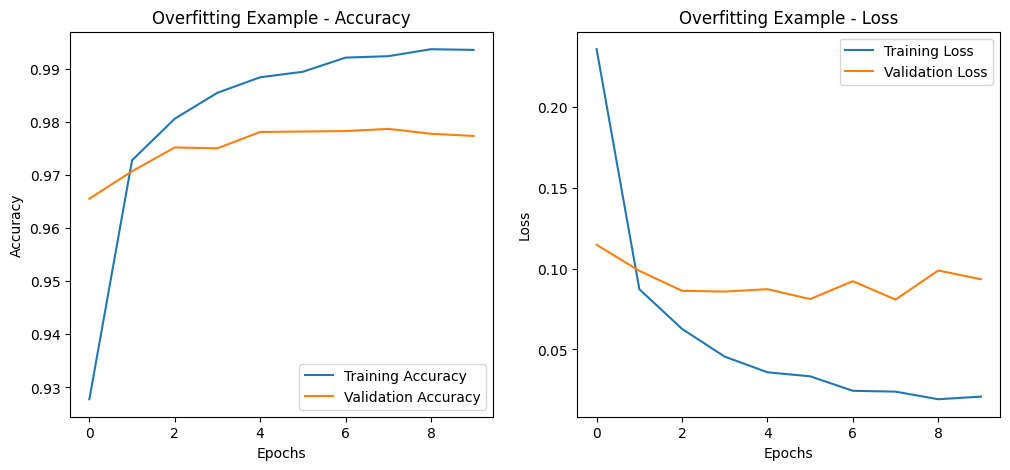

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load MNIST dataset (handwritten digits 0-9)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (28x28 -> 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Build an over-parameterized model (intentionally too complex)
model = keras.Sequential([
    layers.Dense(1024, activation="relu", input_shape=(784,)),
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model with validation
history = model.fit(
    x_train, y_train,
    epochs=10,              # Many epochs to force overfitting
    batch_size=128,
    validation_split=0.2,   # 20% of training data for validation
    verbose=2
)

# Plot Training vs Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Overfitting Example - Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Overfitting Example - Loss")
plt.legend()

plt.show()